## Import Python Libraries

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib

## Load the dataset from the xlsx file into data

In [8]:
data = pd.read_excel('ENB2012_data.xlsx')

In [9]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


## Convert the data into DataFrame

In [10]:
df = pd.DataFrame(data)
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


## Display first 3 entries in the DataFrame

In [11]:
df.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33


## Display last 3 entries in the DataFrame

In [12]:
df.tail(3)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


## Series of labels that identify each row.

In [22]:
df.index

RangeIndex(start=0, stop=768, step=1)

## Display total number of Elements in the DataFrame

In [23]:
df.size

7680

## Display total number of rows and columns in the DataFrame

In [13]:
df.shape

(768, 10)

## List the columns in the DataFrame

In [24]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

## Provides information about the DataFrame

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


## Descriptive Analysis
### Provides Statistical measures for the numerical columns

In [15]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


## Data Cleaning

### Check for total number of null values
- A missing or unknown value

In [16]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

### Check nan values
- An undefined value or value that cannot be represented, especially results of floating-point calculations.

In [17]:
df.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

### Check for Duplicate Values

In [18]:
df.duplicated().sum()

0

## Display data type of all columns in the DataFrame

In [25]:
df.dtypes

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
Y2    float64
dtype: object

## Plotting boxplot to check for outliers

<Axes: >

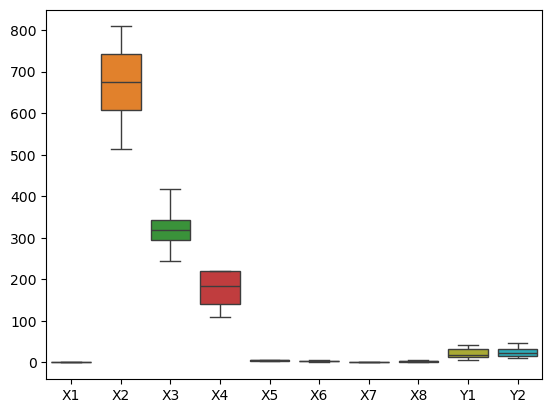

In [26]:
sns.boxplot(data = df)

## Correlation Analysis

In [101]:
co = df.corr()
co

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,5.878473e-17,-2.096261e-15,-1.896390e-16,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.066832e-17,3.623317e-15,2.441409e-15,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.510469e-17,-8.647953e-17,2.077332e-16,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.591507e-17,-1.753224e-15,-1.068485e-15,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.876676e-17,-1.977685e-16,-9.524163e-17,0.889430,0.895785
X6,5.878473e-17,-3.066832e-17,-2.510469e-17,-5.591507e-17,4.876676e-17,1.000000e+00,-9.366058e-16,-2.608346e-16,-0.002587,0.014290
X7,-2.096261e-15,3.623317e-15,-8.647953e-17,-1.753224e-15,-1.977685e-16,-9.366058e-16,1.000000e+00,2.129642e-01,0.269842,0.207505
X8,-1.896390e-16,2.441409e-15,2.077332e-16,-1.068485e-15,-9.524163e-17,-2.608346e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-2.586763e-03,2.698417e-01,8.736846e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


## Heat Map

<Axes: >

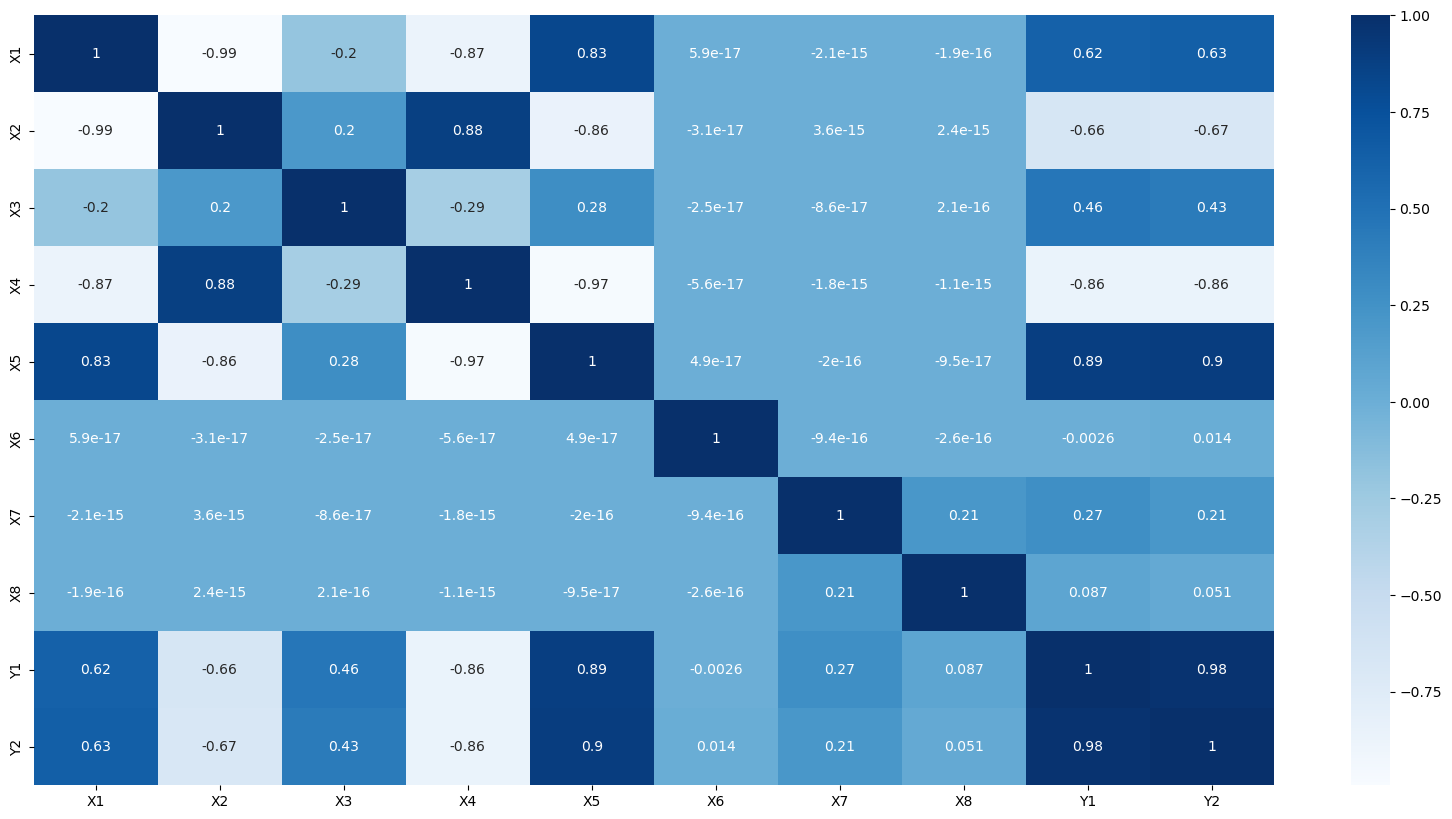

In [31]:
plt.figure(figsize = (20, 10))
sns.heatmap(co, annot = True, cmap = 'Blues')

## Shape of Distribution Data
### Skewness

In [32]:
df.skew()

X1    0.495513
X2   -0.125131
X3    0.533417
X4   -0.162764
X5    0.000000
X6    0.000000
X7   -0.060254
X8   -0.088689
Y1    0.360446
Y2    0.395992
dtype: float64

### Kurtosis

In [33]:
df.kurt()

X1   -0.706568
X2   -1.059454
X3    0.116593
X4   -1.776947
X5   -2.005229
X6   -1.361042
X7   -1.327629
X8   -1.148709
Y1   -1.245569
Y2   -1.147190
dtype: float64

## Choosing X and Y values

In [37]:
x = df.drop(['Y1'], axis = 1)
y = df['Y1']

## Feature Selection

In [39]:
skb = SelectKBest(score_func = f_regression, k = 'all')

In [40]:
x_new = skb.fit_transform(x, y)

In [41]:
selected_cols = x.columns[skb.get_support()]
selected_cols

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y2'], dtype='object')

In [45]:
x_selected = x[selected_cols]
x_selected

,X1,X2,X3,X4,X5,X6,X7,X8,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.28
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.61


In [102]:
x_selected.to_csv('Energy eff.csv', index = False)

## Scaling

In [44]:
ss = StandardScaler()

In [49]:
x_scaled = ss.fit_transform(x_selected)
x_scaled

array([[ 2.04177671, -1.78587489, -0.56195149, ..., -1.76044698,
        -1.81457514, -0.34266569],
       [ 2.04177671, -1.78587489, -0.56195149, ..., -1.76044698,
        -1.81457514, -0.34266569],
       [ 2.04177671, -1.78587489, -0.56195149, ..., -1.76044698,
        -1.81457514, -0.34266569],
       ...,
       [-1.36381225,  1.55394308,  1.12390297, ...,  1.2440492 ,
         1.41133622, -0.78654401],
       [-1.36381225,  1.55394308,  1.12390297, ...,  1.2440492 ,
         1.41133622, -0.83913623],
       [-1.36381225,  1.55394308,  1.12390297, ...,  1.2440492 ,
         1.41133622, -0.9001432 ]])

## Training and Testing

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)

In [52]:
print('X_train Shape:', x_train.shape)
print('X_test Shape:', x_test.shape)
print('Y_train Shape:', y_train.shape)
print('Y_test Shape:', y_test.shape)

X_train Shape: (614, 9)
X_test Shape: (154, 9)
Y_train Shape: (614,)
Y_test Shape: (154,)


In [53]:
y.value_counts()

Y1
15.16    6
13.00    5
15.23    4
28.15    4
14.60    4
        ..
33.21    1
36.77    1
36.71    1
37.03    1
16.64    1
Name: count, Length: 587, dtype: int64

## Simple Linear Regression - Only One Feature

In [69]:
lr = LinearRegression()

In [70]:
lr.fit(x_train, y_train)

LinearRegression()

In [71]:
y_pred_lr = lr.predict(x_test)

In [72]:
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

In [73]:
print("\nSimple Regression Evaluation:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


Simple Regression Evaluation:
MAE: 1.3759039923247651
MSE: 3.783467716446493
RMSE: 1.9451138055256543
R2 Score: 0.9637016188869209


## Decision Tree Regressor

In [55]:
dtr = DecisionTreeRegressor()

In [56]:
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [57]:
y_pred_dtr = dtr.predict(x_test)

In [58]:
MAE = mean_absolute_error(y_test, y_pred_dtr)
MSE = mean_squared_error(y_test, y_pred_dtr)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred_dtr)

In [59]:
print("\nDecision Tree Regression Evaluation:")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R2 Score:", R2)


Decision Tree Regression Evaluation:
MAE: 0.3951558441558443
MSE: 0.9481152987012986
RMSE: 0.9737121231150913
R2 Score: 0.9909038339875875


## Support Vector Regressor

In [62]:
svr = SVR()

In [63]:
svr.fit(x_train, y_train)

SVR()

In [64]:
y_pred_svr = svr.predict(x_test)

In [65]:
MAE = mean_absolute_error(y_test, y_pred_svr)
MSE = mean_squared_error(y_test, y_pred_svr)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred_svr)

In [66]:
print("\nSupport Vector Regression Evaluation:")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R2 Score:", R2)


Support Vector Regression Evaluation:
MAE: 1.3178895812972369
MSE: 3.8236514227773597
RMSE: 1.9554159206617296
R2 Score: 0.9633160986192063


## Ensemble Learning - RandomForestRegressor

In [81]:
rfg = RandomForestRegressor()

In [82]:
rfg.fit(x_train, y_train)

RandomForestRegressor()

In [85]:
y_pred_rfg = rfg.predict(x_test)

In [87]:
MAE = mean_absolute_error(y_test, y_pred_rfg)
MSE = mean_squared_error(y_test, y_pred_rfg)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred_rfg)

In [88]:
print("\nRandom Forest Regressor Evaluation:")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R2 Score:", R2)


Random Forest Regressor Evaluation:
MAE: 0.41715129870130274
MSE: 0.7825552734415617
RMSE: 0.8846215424923597
R2 Score: 0.9924922077611619


## Gradient Boosting Regressor

In [90]:
gbr = GradientBoostingRegressor()

In [91]:
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [92]:
y_pred_gbr = gbr.predict(x_test)

In [93]:
MAE = mean_absolute_error(y_test, y_pred_gbr)
MSE = mean_squared_error(y_test, y_pred_gbr)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred_gbr)

In [94]:
print("\nGradient Boosting Regressor Evaluation:")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R2 Score:", R2)


Gradient Boosting Regressor Evaluation:
MAE: 0.5970388688355687
MSE: 0.8478538670003564
RMSE: 0.9207898060905955
R2 Score: 0.9918657366471513


## AdaBoost Regressor

In [96]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "AdaBoost": AdaBoostRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100)
}


In [98]:
# Store results
metrics = []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    metrics.append({
        "Model": name,
        "MAE": round(mae, 2),
        "MSE": round(mse, 2),
        "RMSE": round(rmse, 2),
        "R² Score": round(r2, 4)
    })
# Convert to DataFrame for nice display
results_df = pd.DataFrame(metrics)
print(results_df)


               Model   MAE   MSE  RMSE  R² Score
0  Linear Regression  1.38  3.78  1.95    0.9637
1      Decision Tree  0.37  0.89  0.94    0.9915
2      Random Forest  0.43  0.80  0.90    0.9923
3           AdaBoost  1.44  3.05  1.75    0.9708
4  Gradient Boosting  0.60  0.85  0.92    0.9919


## Creating a Pipeline

In [108]:
pipeline = Pipeline([('Imputer', SimpleImputer(strategy = 'mean')),
                     ('Scaler', StandardScaler()),
                     ('Regressor', RandomForestRegressor(random_state = 42))])

In [109]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('Imputer', SimpleImputer()), ('Scaler', StandardScaler()),
                ('Regressor', RandomForestRegressor(random_state=42))])

### Saving the Pipeline

In [110]:
joblib.dump(pipeline, 'Energy.joblib')

['Energy.joblib']

In [111]:
loaded_pipeline = joblib.load('Energy.joblib')

In [115]:
df_unseen = pd.read_csv('Unseen Energy.csv')
df_unseen

,X1,X2,X3,X4,X5,X6,X7,X8,Y2,Y1
0,0.98,514.5,294.0,110.25,7,2,0,0,21.33,15.55
1,0.98,514.5,294.0,110.25,7,3,0,0,21.33,15.55
2,0.98,514.5,294.0,110.25,7,4,0,0,21.33,15.55
3,0.98,514.5,294.0,110.25,7,5,0,0,21.33,15.55
4,0.90,563.5,318.5,122.50,7,2,0,0,28.28,20.84
5,0.90,563.5,318.5,122.50,7,3,0,0,25.38,21.46
6,0.90,563.5,318.5,122.50,7,4,0,0,25.16,20.71
7,0.90,563.5,318.5,122.50,7,5,0,0,29.60,19.68
8,0.86,588.0,294.0,147.00,7,2,0,0,27.30,19.50
9,0.86,588.0,294.0,147.00,7,3,0,0,21.97,19.95


In [116]:
x_unseen = df_unseen.drop('Y1', axis = 1)

In [117]:
y_unseen = df_unseen['Y1']

In [124]:
y_pred_unseen = loaded_pipeline.predict(x_unseen)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [126]:
df_unseen['Predicted'] = y_pred_unseen

In [127]:
df_unseen[['Y1', 'Predicted']].head(10)

,Y1,Predicted
0,15.55,36.0883
1,15.55,36.0883
2,15.55,36.0883
3,15.55,36.0883
4,20.84,36.0883
5,21.46,36.0883
6,20.71,36.0883
7,19.68,36.0883
8,19.50,36.0883
9,19.95,36.0883
